# Lesson 5: Data Analysis Process - Case Study 2

Investigating a dataset on [fuel economy data](https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy)
provided by the [EPA (Environmental Protection Agency)](https://www.epa.gov/):

The EPA fuel economy data is available [here](https://www.fueleconomy.gov/feg/download.shtml).
However, we used a simplified dataset provided in the Udacity lesson.
The [Readme](http://www.fueleconomy.gov/feg/epadata/Readme.txt)
and the [Green Vehicle Guide Datafile](http://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf)
give more information on the data.

## Import the fuel economy datasets

In [1]:
import numpy as np
import pandas as pd

df_all_08 = pd.read_csv('../resources/lesson5/all_alpha_08.csv')
df_all_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [2]:
df_all_18 = pd.read_csv('../resources/lesson5/all_alpha_18.csv')
df_all_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


## Cleaning Column Labels

Drop inconsistent or irrelevant columns.

In [3]:
df_all_08.drop(["Stnd", "Underhood ID", "FE Calc Appr", "Unadj Cmb MPG"], axis=1, inplace=True)
df_all_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [4]:
df_all_18.drop(["Stnd", "Underhood ID", "Stnd Description", "Comb CO2"], axis=1, inplace=True)
df_all_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


For consistency, we rename the `Sales Area` in the 2008 dataset
to `Cert Region` like in the 2018 dataset.

In [5]:
df_all_08.rename({"Sales Area" : "Cert Region"}, axis=1, inplace=True)
df_all_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

Now, we replace spaces by underscores in the column labels.

In [6]:
underscore_lowercase = lambda s: s.strip().lower().replace(' ', '_')
df_all_08.columns = df_all_08.columns.map(underscore_lowercase)
df_all_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [7]:
df_all_18.columns = df_all_18.columns.map(underscore_lowercase)
df_all_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

Now the column labels should be same in both datasets.

In [8]:
(df_all_08.columns == df_all_18.columns).all()

True

We use pre-defined column names.

In [9]:
class Col:
    """ Column names for the fuel consumption datasets. """
    model = "model"
    displ = "displ"
    cyl = "cyl"
    trans = "trans"
    drive = "drive"
    fuel = "fuel"
    cert_region = "cert_region"
    veh_class = "veh_class"
    air_pollution_score = "air_pollution_score"
    city_mpg = "city_mpg"
    hwy_mpg = "hwy_mpg"
    cmb_mpg = "cmb_mpg"
    greenhouse_gas_score = "greenhouse_gas_score"
    smartway = "smartway"
    # additional columns
    mpg_change = "mpg_change"
    city_lp100km = "city_lp100km"
    hwy_lp100km = "hwy_lp100km"
    cmb_lp100km = "cmb_lp100km"
    city_kmpl = "city_kmpl"
    hwy_kmpl = "hwy_kmpl"
    cmb_kmpl = "cmb_kmpl"

## Characteristics of the datasets

Note: differently from the Udacity lesson, here the cleaning _preceded_ exploring the dataset
so that some results, e.g. number of columns, would be different.

#### Size of the datasets

In [10]:
df_all_08.shape

(2404, 14)

In [11]:
df_all_18.shape

(1611, 14)

#### Duplicate rows

In [12]:
sum(df_all_08.duplicated())

110

In [13]:
sum(df_all_18.duplicated())

5

#### Missing data

In [14]:
df_all_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 2404 non-null   object 
 1   displ                 2404 non-null   float64
 2   cyl                   2205 non-null   object 
 3   trans                 2205 non-null   object 
 4   drive                 2311 non-null   object 
 5   fuel                  2404 non-null   object 
 6   cert_region           2404 non-null   object 
 7   veh_class             2404 non-null   object 
 8   air_pollution_score   2404 non-null   object 
 9   city_mpg              2205 non-null   object 
 10  hwy_mpg               2205 non-null   object 
 11  cmb_mpg               2205 non-null   object 
 12  greenhouse_gas_score  2205 non-null   object 
 13  smartway              2404 non-null   object 
dtypes: float64(1), object(13)
memory usage: 263.1+ KB


In [15]:
df_all_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1611 non-null   object 
 1   displ                 1609 non-null   float64
 2   cyl                   1609 non-null   float64
 3   trans                 1611 non-null   object 
 4   drive                 1611 non-null   object 
 5   fuel                  1611 non-null   object 
 6   cert_region           1611 non-null   object 
 7   veh_class             1611 non-null   object 
 8   air_pollution_score   1611 non-null   int64  
 9   city_mpg              1611 non-null   object 
 10  hwy_mpg               1611 non-null   object 
 11  cmb_mpg               1611 non-null   object 
 12  greenhouse_gas_score  1611 non-null   int64  
 13  smartway              1611 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 176.3+ KB


#### Data types

Data types of the columns `cyl`, `city_mpg`, and `greenhouse_gas_score` in both datasets.

In [16]:
type(df_all_08[Col.city_mpg])

pandas.core.series.Series

We put the results into one data frame for a better overview.

In [17]:
def get_col_value_types(df, cols): 
    return list(map(lambda col: type(df[col][0]), cols))

columns = [Col.cyl, Col.city_mpg, Col.greenhouse_gas_score]
types08 = get_col_value_types(df_all_08, columns)
types18 = get_col_value_types(df_all_18, columns)
pd.DataFrame([types08, types18], index=['2008', '2018'], columns=columns)

,cyl,city_mpg,greenhouse_gas_score
2008,<class 'str'>,<class 'str'>,<class 'str'>
2018,<class 'numpy.float64'>,<class 'str'>,<class 'numpy.int64'>


#### Unique values

Unique values for the columns `smartway` (2008/2018), `sales_area` (2008), `cert_region` (2018),
and `trans` (2008/2018).

In [18]:
df_all_08[Col.smartway].nunique()

2

We put the results into one data frame for a better overview.

In [19]:
def get_num_of_unique_values(df, cols): 
    return list(map(lambda col: df[col].nunique(), cols))

columns = [Col.smartway, Col.cert_region, Col.trans]
nunique08 = get_num_of_unique_values(df_all_08, columns)
nunique18 = get_num_of_unique_values(df_all_18, columns)
pd.DataFrame([nunique08, nunique18], index=['2008', '2018'], columns=columns)

,smartway,cert_region,trans
2008,2,3,14
2018,3,2,26


#### Fuel types

Which fuel types are present in one or both datasets.

In [20]:
df_all_08[Col.fuel].unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [21]:
df_all_18[Col.fuel].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

## Filter, Drop nulls, Dedupe

Filter data for California.

In [22]:
df_ca_08 = df_all_08[df_all_08[Col.cert_region] == 'CA'].copy()
df_ca_08[Col.cert_region].unique()

array(['CA'], dtype=object)

In [23]:
df_ca_08.drop(Col.cert_region, axis=1, inplace=True)
df_ca_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [24]:
df_ca_18 = df_all_18[df_all_18[Col.cert_region] == 'CA'].copy()
df_ca_18[Col.cert_region].unique()

array(['CA'], dtype=object)

In [25]:
df_ca_18.drop(Col.cert_region, axis=1, inplace=True)
df_ca_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


In [26]:
df_ca_08.shape

(1084, 13)

In [27]:
df_ca_18.shape

(798, 13)

Drop rows with missing values.

In [28]:
df_ca_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [29]:
df_ca_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [30]:
df_ca_08.dropna(inplace=True)
df_ca_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 2400
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1009 non-null   object 
 1   displ                 1009 non-null   float64
 2   cyl                   1009 non-null   object 
 3   trans                 1009 non-null   object 
 4   drive                 1009 non-null   object 
 5   fuel                  1009 non-null   object 
 6   veh_class             1009 non-null   object 
 7   air_pollution_score   1009 non-null   object 
 8   city_mpg              1009 non-null   object 
 9   hwy_mpg               1009 non-null   object 
 10  cmb_mpg               1009 non-null   object 
 11  greenhouse_gas_score  1009 non-null   object 
 12  smartway              1009 non-null   object 
dtypes: float64(1), object(12)
memory usage: 110.4+ KB


In [31]:
df_ca_08.isnull().sum().any()

False

In [32]:
df_ca_18.dropna(inplace=True)
df_ca_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 1 to 1609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 797 non-null    object 
 1   displ                 797 non-null    float64
 2   cyl                   797 non-null    float64
 3   trans                 797 non-null    object 
 4   drive                 797 non-null    object 
 5   fuel                  797 non-null    object 
 6   veh_class             797 non-null    object 
 7   air_pollution_score   797 non-null    int64  
 8   city_mpg              797 non-null    object 
 9   hwy_mpg               797 non-null    object 
 10  cmb_mpg               797 non-null    object 
 11  greenhouse_gas_score  797 non-null    int64  
 12  smartway              797 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 87.2+ KB


In [33]:
df_ca_18.isnull().sum().any()

False

Drop duplicates.

In [34]:
pd.Series([sum(df_ca_08.duplicated()), sum(df_ca_18.duplicated())],
          index=['2008', '2018'], name='Duplicate count')

2008    23
2018     3
Name: Duplicate count, dtype: int64

In [35]:
df_ca_08.drop_duplicates(inplace=True)
df_ca_08.duplicated().sum().any()

False

In [36]:
df_ca_18.drop_duplicates(inplace=True)
df_ca_18.duplicated().sum().any()

False

In [37]:
pd.DataFrame([[df_ca_08.shape, df_ca_08.columns.size],
              [df_ca_18.shape, df_ca_18.columns.size]],
             columns=['Shape', 'Column count'],
             index=['2008', '2018'])

,Shape,Column count
2008,"(986, 13)",13
2018,"(794, 13)",13


## Inspecting data types

`cyl` column.

In [38]:
df_ca_08[Col.cyl].unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object)

In [39]:
df_ca_18[Col.cyl].unique()

array([ 6.,  4.,  5., 12., 16.,  8.,  3.])

`air_pollution_score` column.

In [40]:
df_ca_08[Col.air_pollution_score].unique()

array(['7', '6', '9.5', '9', '6/4'], dtype=object)

In [41]:
df_ca_18[Col.air_pollution_score].unique()

array([3, 1, 7, 5, 6], dtype=int64)

MPG columns.

In [42]:
df_ca_08[[Col.city_mpg, Col.hwy_mpg, Col.cmb_mpg]]

,city_mpg,hwy_mpg,cmb_mpg
0,15,20,17
2,17,22,19
4,16,24,19
6,18,26,21
7,17,26,20
...,...,...,...
2394,16,24,19
2396,15,22,17
2398,14,20,16
2399,14,20,16


In [43]:
df_ca_08[[Col.city_mpg, Col.hwy_mpg, Col.cmb_mpg]].dtypes

city_mpg    object
hwy_mpg     object
cmb_mpg     object
dtype: object

In [44]:
df_ca_18[[Col.city_mpg, Col.hwy_mpg, Col.cmb_mpg]]

,city_mpg,hwy_mpg,cmb_mpg
1,20,28,23
3,19,27,22
4,23,33,27
6,20,32,24
8,21,30,24
...,...,...,...
1601,26/60,28/58,26/59
1603,22,29,25
1605,22,28,24
1607,20,27,23


In [45]:
df_ca_18[[Col.city_mpg, Col.hwy_mpg, Col.cmb_mpg]].dtypes

city_mpg    object
hwy_mpg     object
cmb_mpg     object
dtype: object

`greenhouse_gas_score` column.

In [46]:
df_ca_08[Col.greenhouse_gas_score].dtype

dtype('O')

In [47]:
df_ca_08[Col.greenhouse_gas_score].unique()

array(['4', '5', '6', '7', '0', '1', '3', '2', '8', '9', '10', '7/6'],
      dtype=object)

In [48]:
df_ca_18[Col.greenhouse_gas_score].dtype

dtype('int64')

In [49]:
df_ca_18[Col.greenhouse_gas_score].unique()

array([ 5,  4,  6,  7,  2,  1, 10,  3,  9,  8], dtype=int64)

## Fixing data types

#### `cyl` column

Fix `cyl` datatype: convert to `int`.

Hint from sample solution: [Stackoverflow: Extract int from string in Pandas](https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas).

In [50]:
df_ca_08[Col.cyl] = df_ca_08[Col.cyl].str.extract('(\d+)').astype('int64')
df_ca_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [51]:
df_ca_08[Col.cyl].dtype

dtype('int64')

In [52]:
df_ca_18[Col.cyl] = df_ca_18[Col.cyl].apply(int)
df_ca_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


In [53]:
df_ca_18[Col.cyl].dtype

dtype('int64')

#### `air_pollution_score` column

Fix `air_pollution_score` datatype: convert to `float`.

In [54]:
df_ca_08[Col.air_pollution_score].unique()

array(['7', '6', '9.5', '9', '6/4'], dtype=object)

The string value `6/4` is not a fraction but represents different values,
see [here](https://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore):
> If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type.

In [55]:
df_ca_dual_fuel_08 = df_ca_08[df_ca_08[Col.fuel].str.contains('/')]
df_ca_dual_fuel_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [56]:
df_ca_dual_fuel_18 = df_ca_18[df_ca_18[Col.fuel].str.contains('/')]
df_ca_dual_fuel_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


We split the rows with dual fuel into one row per fuel type.

In [57]:
def split_dual_columns(df, split_columns):
    df1 = df.copy()
    df2 = df.copy()
    for c in split_columns:
        df1[c] = df1[c].apply(lambda x: x.split('/')[0])
        df2[c] = df2[c].apply(lambda x: x.split('/')[1])
    return df1.append(df2)

In [58]:
df_ca_split_only_08 = split_dual_columns(df_ca_dual_fuel_08,
    split_columns=[Col.fuel, Col.air_pollution_score, Col.greenhouse_gas_score, Col.city_mpg, Col.cmb_mpg, Col.hwy_mpg])
df_ca_split_only_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [59]:
df_ca_split_only_18 = split_dual_columns(df_ca_dual_fuel_18, split_columns=[Col.fuel, Col.city_mpg, Col.cmb_mpg, Col.hwy_mpg])
df_ca_split_only_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5,13,17,14,1,No
1517,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5,13,17,15,2,No
1577,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7,70,72,71,10,Elite
1601,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite


Drop original rows with dual fuel and append split rows.

In [60]:
df_ca_08.drop(df_ca_split_only_08.index, inplace=True)
df_ca_split_08 = df_ca_08.append(df_ca_split_only_08, ignore_index=True)
df_ca_split_08.shape

(987, 13)

In [61]:
df_ca_18.drop(df_ca_split_only_18.index, inplace=True)
df_ca_split_18 = df_ca_18.append(df_ca_split_only_18, ignore_index=True)
df_ca_split_18.shape

(832, 13)

Check that there are no more rows with `\`.

In [62]:
df_ca_split_08[df_ca_split_08[Col.fuel].str.contains('/')].size

0

In [63]:
df_ca_split_18[df_ca_split_18[Col.fuel].str.contains('/')].size

0

Now we can convert the `air_pollution_score` type.

In [64]:
df_ca_split_08[Col.air_pollution_score] = df_ca_split_08[Col.air_pollution_score].str.extract('([\d\.]+)').astype(float)
df_ca_split_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15,20,17,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17,22,19,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16,24,19,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18,26,21,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17,26,20,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7.0,14,20,16,4,no
983,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7.0,14,20,16,4,no
984,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,SUV,7.0,13,19,15,3,no
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13,19,15,7,no


In [65]:
df_ca_split_18[Col.air_pollution_score] = df_ca_split_18[Col.air_pollution_score].astype(float)
df_ca_split_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20,28,23,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19,27,22,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23,33,27,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20,32,24,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21,30,24,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5.0,13,17,14,1,No
828,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5.0,13,17,15,2,No
829,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7.0,70,72,71,10,Elite
830,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7.0,60,58,59,10,Elite


#### `MPG` columns 

Fix datatype in the columns `city_mpg`, `hwy_mpg`, `cmb_mpg`: convert to `float`.

In [66]:
mpg_columns = [Col.city_mpg, Col.cmb_mpg, Col.hwy_mpg]
for c in mpg_columns:
    df_ca_split_08[c] = df_ca_split_08[c].astype(float)
    df_ca_split_18[c] = df_ca_split_18[c].astype(float)

In [67]:
df_ca_split_08.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no


In [68]:
df_ca_split_18.head(2)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No


#### `greenhouse_gas_score` columns

Fix datatype in the `greenhouse_gas_score` column: convert to `int` for 2008 dataset.

In [69]:
df_ca_split_08[Col.greenhouse_gas_score] = df_ca_split_08[Col.greenhouse_gas_score].astype('int64')

In [70]:
df_ca_split_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


In [71]:
df_ca_split_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [72]:
df_ca_split_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [73]:
all_types_are_equal = (df_ca_split_08.dtypes == df_ca_split_18.dtypes).all()
print("Data types in both data frames are", "equal" if all_types_are_equal else "not equal")

Data types in both data frames are equal


## Exploring with Visuals

In [74]:
df_clean_08 = pd.read_csv('../resources/lesson5/clean_08.csv')
df_clean_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [75]:
df_clean_18 = pd.read_csv('../resources/lesson5/clean_18.csv')
df_clean_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


#### Add `liter per 100 km` columns

In [76]:
def mpg_to_liter_per_100_km(mpg):
    return 235.2145833 / mpg

In [77]:
mpg_columns = [Col.city_mpg, Col.cmb_mpg, Col.hwy_mpg]
lp100km_columns = [Col.city_lp100km, Col.cmb_lp100km, Col.hwy_lp100km]
kmpl_columns = [Col.city_kmpl, Col.cmb_kmpl, Col.hwy_kmpl]
for mpg, lp100km, kmpl in zip(mpg_columns, lp100km_columns, kmpl_columns):
    df_clean_08[lp100km] = df_clean_08[mpg].apply(mpg_to_liter_per_100_km)
    df_clean_18[lp100km] = df_clean_18[mpg].apply(mpg_to_liter_per_100_km)
    df_clean_08[kmpl] = 100 / df_clean_08[lp100km]
    df_clean_18[kmpl] = 100 / df_clean_18[lp100km]

In [78]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Comparing distribution of `greenhouse_gas_score` in 2008 and 2018

In [79]:
pd.Series(map(lambda df: df[Col.greenhouse_gas_score].nunique(), [df_clean_08, df_clean_18]),
          index=['2008', '2018'], name="Unique values in 'greenhouse_gas_score' column")

2008    11
2018    10
Name: Unique values in 'greenhouse_gas_score' column, dtype: int64

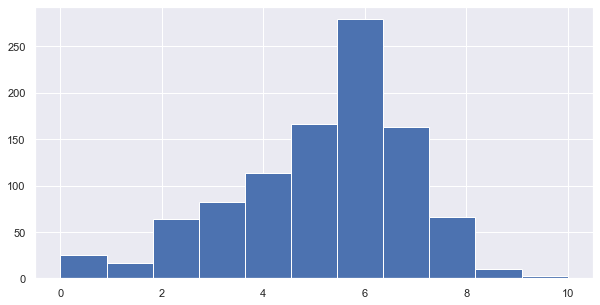

In [80]:
df_clean_08[Col.greenhouse_gas_score].hist(bins=11, figsize=(10, 5));

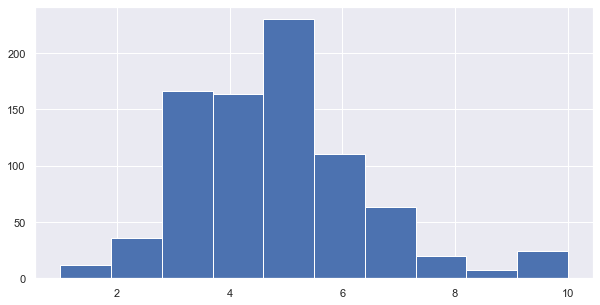

In [81]:
df_clean_18[Col.greenhouse_gas_score].hist(bins=10, figsize=(10, 5));

#### Change of distribution of combined mpg `cmb_mpg` from 2008 to 2018

In [82]:
pd.Series(map(lambda df: df[Col.cmb_mpg].nunique(), [df_clean_08, df_clean_18]),
          index=['2008', '2018'], name="Unique values in 'cmb_mpg' column")

2008    26
2018    43
Name: Unique values in 'cmb_mpg' column, dtype: int64

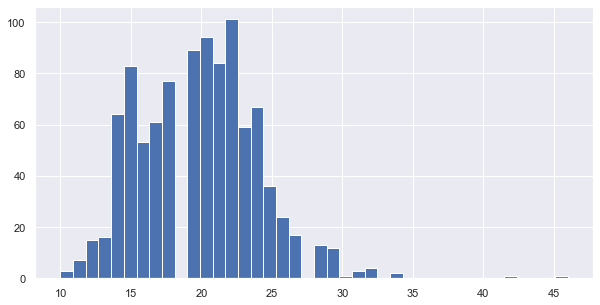

In [83]:
df_clean_08[Col.cmb_mpg].hist(bins=40, figsize=(10, 5));

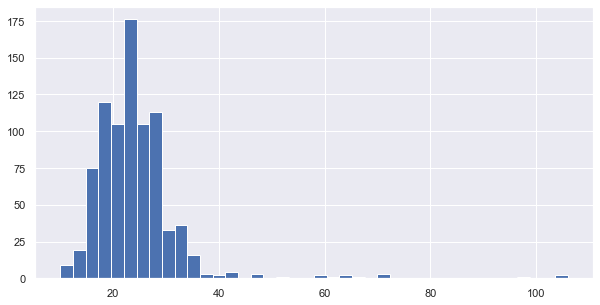

In [84]:
df_clean_18[Col.cmb_mpg].hist(bins=40, figsize=(10, 5));

#### Correlation between displacement and combined mpg `cmb_mpg`

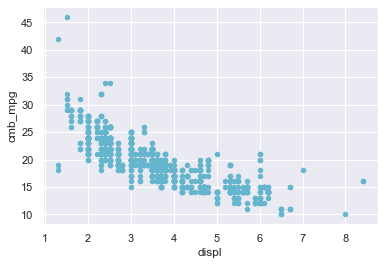

In [85]:
color = 'c'
df_clean_08.plot(kind='scatter', c=color, x=Col.displ, y=Col.cmb_mpg);

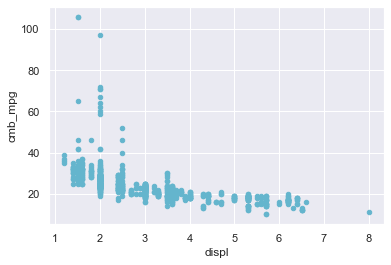

In [86]:
df_clean_18.plot(kind='scatter', c=color, x=Col.displ, y=Col.cmb_mpg);

In [87]:
print("Correlation between displacement and combined mpg:")
print("2008: {:.2f}".format(np.corrcoef([df_clean_08[Col.displ].values, df_clean_08[Col.cmb_mpg].values])[1, 0]))
print("2018: {:.2f}".format(np.corrcoef([df_clean_18[Col.displ].values, df_clean_18[Col.cmb_mpg].values])[1, 0]))

Correlation between displacement and combined mpg:
2008: -0.82
2018: -0.57


#### Correlation between `greenhouse_gas_score` and combined mpg `cmb_mpg`

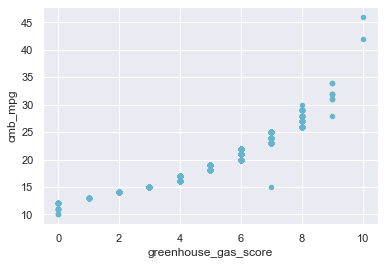

In [88]:
color = 'c'
df_clean_08.plot(kind='scatter', c=color, x=Col.greenhouse_gas_score, y=Col.cmb_mpg);

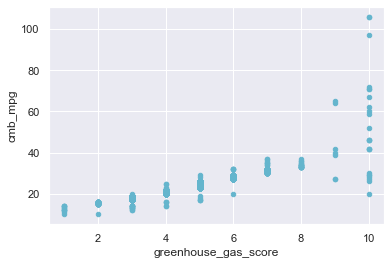

In [89]:
df_clean_18.plot(kind='scatter', c=color, x=Col.greenhouse_gas_score, y=Col.cmb_mpg);

In [90]:
print("Correlation between green house score and combined mpg:")
print("2008: {:.2f}".format(np.corrcoef([df_clean_08[Col.greenhouse_gas_score].values, df_clean_08[Col.cmb_mpg].values])[1, 0]))
print("2018: {:.2f}".format(np.corrcoef([df_clean_18[Col.greenhouse_gas_score].values, df_clean_18[Col.cmb_mpg].values])[1, 0]))

Correlation between green house score and combined mpg:
2008: 0.95
2018: 0.81


## Conclusions and Visuals

#### Q1: Models using alternative fuels

Are there more unique models using alternative fuels in 2018 than in 2008? By how much?

Which fuels are there in the datasets?

In [91]:
df_clean_08[Col.fuel].value_counts()

Gasoline    984
gas           1
CNG           1
ethanol       1
Name: fuel, dtype: int64

In [92]:
df_clean_18[Col.fuel].value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

Select models with alternative fuels.

In [93]:
alt_fuel_08 = df_clean_08.query(f'{Col.fuel} in ["CNG", "ethanol"]')
alt_fuel_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,city_lp100km,city_kmpl,cmb_lp100km,cmb_kmpl,hwy_lp100km,hwy_kmpl
388,HONDA Civic,1.8,4,Auto-L5,2WD,CNG,small car,9.5,24.0,36.0,28.0,9,yes,9.800608,10.203449,8.400521,11.904024,6.533738,15.305173
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no,18.093429,5.526868,15.680972,6.377156,12.379715,8.077730


In [94]:
alt_fuel_18 = df_clean_18.query(f'{Col.fuel} in ["Ethanol", "Electricity"]')
alt_fuel_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,city_lp100km,city_kmpl,cmb_lp100km,cmb_kmpl,hwy_lp100km,hwy_kmpl
760,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5.0,14.0,20.0,16.0,4,No,16.801042,5.952012,14.700911,6.802299,11.760729,8.502874
761,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,pickup,5.0,12.0,16.0,14.0,4,No,19.601215,5.101724,16.801042,5.952012,14.700911,6.802299
762,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol,pickup,5.0,12.0,15.0,13.0,3,No,19.601215,5.101724,18.093429,5.526868,15.680972,6.377156
763,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol,pickup,3.0,12.0,17.0,14.0,3,No,19.601215,5.101724,16.801042,5.952012,13.836152,7.227443
764,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol,standard SUV,3.0,12.0,17.0,14.0,3,No,19.601215,5.101724,16.801042,5.952012,13.836152,7.227443


In [95]:
print("Number of models with alternative fuel:")
print(f"2008: {alt_fuel_08[Col.model].nunique()}")
print(f"2018: {alt_fuel_18[Col.model].nunique()}")

Number of models with alternative fuel:
2008: 2
2018: 26


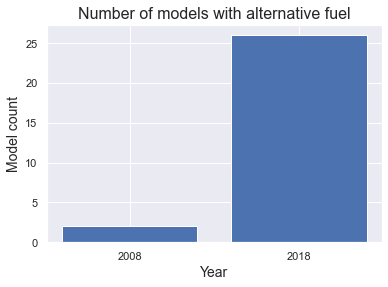

In [96]:
title_font_size = 16
label_font_size = 14

alt_fuel_model_counts = list(map(lambda df: df[Col.model].nunique(), [alt_fuel_08, alt_fuel_18]))
plt.bar(['2008', '2018'], height=alt_fuel_model_counts)
plt.title('Number of models with alternative fuel', fontsize=title_font_size)
plt.xlabel('Year', fontsize=label_font_size)
plt.ylabel('Model count', fontsize=label_font_size);

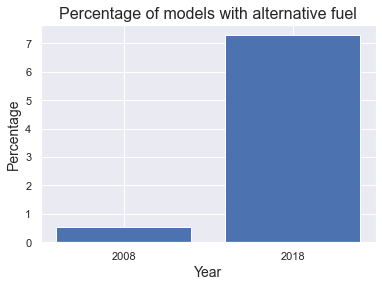

In [97]:
title_font_size = 16
label_font_size = 14

alt_fuel_model_counts = list(map(
    lambda df_alt, df_all: df_alt[Col.model].nunique() / df_all[Col.model].nunique() * 100.0,
    [alt_fuel_08, alt_fuel_18], [df_clean_08, df_clean_18]))
plt.bar(['2008', '2018'], height=alt_fuel_model_counts)
plt.title('Percentage of models with alternative fuel', fontsize=title_font_size)
plt.xlabel('Year', fontsize=label_font_size)
plt.ylabel('Percentage', fontsize=label_font_size);

#### Q2: Fuel economy by vehicle class

How much have vehicles classes improved in fuel economy?

Which vehicle classes are there in the datasets?

In [98]:
df_clean_08[Col.veh_class].value_counts()

small car        333
SUV              280
midsize car      138
pickup            83
station wagon     60
large car         55
van               21
minivan           17
Name: veh_class, dtype: int64

In [99]:
df_clean_18[Col.veh_class].value_counts()

small car          285
midsize car        138
small SUV          108
large car           88
standard SUV        86
pickup              78
station wagon       34
special purpose     10
minivan              5
Name: veh_class, dtype: int64

What was the average consumption per vehicle class

In [100]:
df_clean_08_by_veh_class = df_clean_08.groupby(Col.veh_class)[[Col.cmb_mpg, Col.cmb_lp100km, Col.cmb_kmpl]].mean()
df_clean_08_by_veh_class

,cmb_mpg,cmb_lp100km,cmb_kmpl
veh_class,,,
SUV,18.471429,13.154990,7.853012
large car,18.509091,13.270400,7.869024
midsize car,21.601449,11.354675,9.183720
minivan,19.117647,12.388598,8.127747
pickup,16.277108,14.668976,6.920110
small car,21.105105,11.733273,8.972703
station wagon,22.366667,10.756940,9.509048
van,14.952381,15.809608,6.356911


In [101]:
df_clean_18_by_veh_class = df_clean_18.groupby(Col.veh_class)[[Col.cmb_mpg, Col.cmb_lp100km, Col.cmb_kmpl]].mean()
df_clean_18_by_veh_class

,cmb_mpg,cmb_lp100km,cmb_kmpl
veh_class,,,
large car,23.409091,10.560083,9.952228
midsize car,27.884058,9.078788,11.854732
minivan,20.800000,11.344856,8.842989
pickup,18.589744,12.989637,7.903313
small SUV,24.074074,10.019268,10.234941
small car,25.421053,10.054625,10.807601
special purpose,18.500000,13.049293,7.865159
standard SUV,18.197674,13.586372,7.736627
station wagon,27.529412,8.675420,11.703956


In [102]:
improvement_mpg_by_veh_class = (df_clean_18_by_veh_class - df_clean_08_by_veh_class)[Col.cmb_mpg].dropna()
improvement_mpg_by_veh_class

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

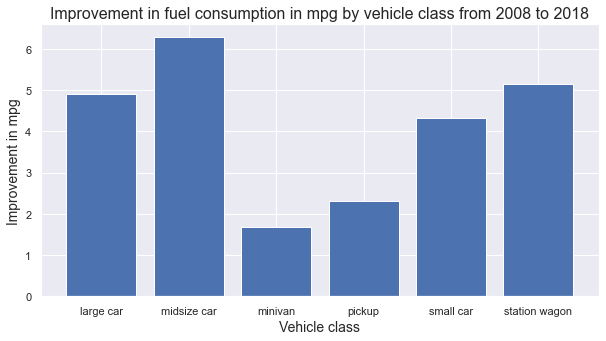

In [103]:
plt.figure(figsize=(10, 5))
plt.bar(improvement_mpg_by_veh_class.index, height=improvement_mpg_by_veh_class)
plt.title('Improvement in fuel consumption in mpg by vehicle class from 2008 to 2018', fontsize=title_font_size)
plt.xlabel('Vehicle class', fontsize=label_font_size)
plt.ylabel('Improvement in mpg', fontsize=label_font_size);

In [104]:
improvement_lp100km_by_veh_class = (df_clean_08_by_veh_class - df_clean_18_by_veh_class)[Col.cmb_lp100km].dropna()
improvement_lp100km_by_veh_class

veh_class
large car        2.710317
midsize car      2.275887
minivan          1.043741
pickup           1.679339
small car        1.678648
station wagon    2.081520
Name: cmb_lp100km, dtype: float64

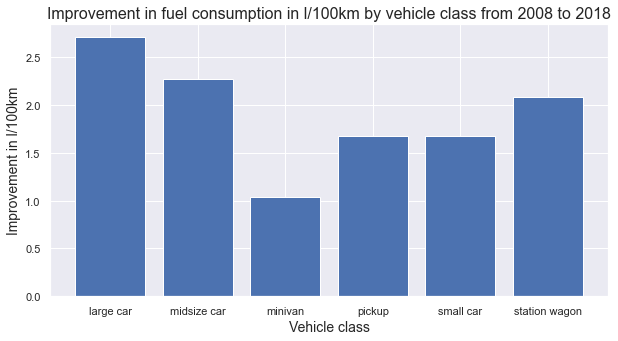

In [105]:
plt.figure(figsize=(10, 5))
plt.bar(improvement_lp100km_by_veh_class.index, height=improvement_lp100km_by_veh_class)
plt.title('Improvement in fuel consumption in l/100km by vehicle class from 2008 to 2018', fontsize=title_font_size)
plt.xlabel('Vehicle class', fontsize=label_font_size)
plt.ylabel('Improvement in l/100km', fontsize=label_font_size);

In [106]:
improvement_mpg_percent_by_veh_class = (df_clean_18_by_veh_class / df_clean_08_by_veh_class * 100.0 - 100)[Col.cmb_mpg].dropna()
improvement_mpg_percent_by_veh_class

veh_class
large car        26.473477
midsize car      29.084200
minivan           8.800000
pickup           14.207899
small car        20.449780
station wagon    23.082318
Name: cmb_mpg, dtype: float64

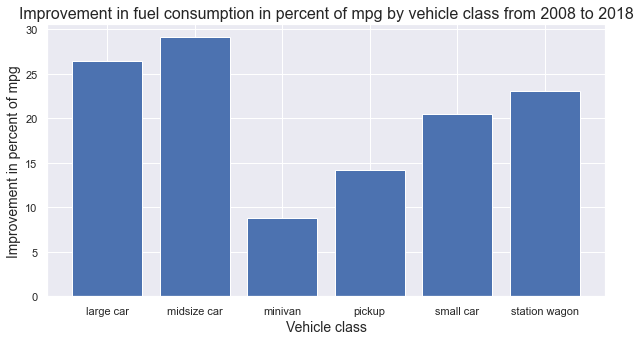

In [107]:
plt.figure(figsize=(10, 5))
plt.bar(improvement_mpg_percent_by_veh_class.index, height=improvement_mpg_percent_by_veh_class)
plt.title('Improvement in fuel consumption in percent of mpg by vehicle class from 2008 to 2018', fontsize=title_font_size)
plt.xlabel('Vehicle class', fontsize=label_font_size)
plt.ylabel('Improvement in percent of mpg', fontsize=label_font_size);

In [108]:
improvement_lp100km_percent_by_veh_class = (df_clean_08_by_veh_class / df_clean_18_by_veh_class * 100.0 - 100)[Col.cmb_lp100km].dropna()
improvement_lp100km_percent_by_veh_class

veh_class
large car        25.665682
midsize car      25.068183
minivan           9.200128
pickup           12.928299
small car        16.695287
station wagon    23.993307
Name: cmb_lp100km, dtype: float64

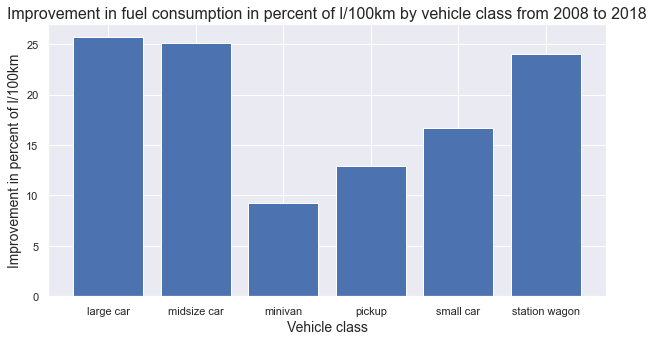

In [109]:
plt.figure(figsize=(10, 5))
plt.bar(improvement_lp100km_percent_by_veh_class.index, height=improvement_lp100km_percent_by_veh_class)
plt.title('Improvement in fuel consumption in percent of l/100km by vehicle class from 2008 to 2018', fontsize=title_font_size)
plt.xlabel('Vehicle class', fontsize=label_font_size)
plt.ylabel('Improvement in percent of l/100km', fontsize=label_font_size);

The percentage improvement fo mpg and l/100km is different
because we calculate them differently: if a vehicle doubles the efficiency, then
- the mpg is double, and the improvement is 100%
- the l/100km is half, and the improvement is 50%

Hence, this difference is due to calculation.
On the other hand, we could adjust the percentage calculation for l/100km to deliver the range improvement,
which would then be the same as for mpg.

In [110]:
# just to demonstrate the calculation of range improvement on l/100km basis.
# The result will be the same (with rounding imprecision) as for mpg improvement.
improvement_kmpl_percent_by_veh_class = (df_clean_18_by_veh_class / df_clean_08_by_veh_class * 100.0 - 100)[Col.cmb_kmpl].dropna()
improvement_kmpl_percent_by_veh_class

veh_class
large car        26.473477
midsize car      29.084200
minivan           8.800000
pickup           14.207899
small car        20.449780
station wagon    23.082318
Name: cmb_kmpl, dtype: float64

Here, we can see that the improvement percentage is, with rounding imprecision,
the same for mpg and km/l.

In [111]:
np.isclose(improvement_kmpl_percent_by_veh_class, improvement_mpg_percent_by_veh_class).all()

True

#### Q3: SmartWay vehicles

What are the characteristics of SmartWay vehicles regarding mpg and greenhouse gas? Have they changed over time?

In [112]:
df_clean_08[Col.smartway].value_counts()

no     607
yes    380
Name: smartway, dtype: int64

In [113]:
df_clean_18[Col.smartway].value_counts()

No       724
Yes       91
Elite     17
Name: smartway, dtype: int64

With SmartWay vehicles having a `yes` in 2008 dataset and `Yes` or `Elite` in 2018 dataset
a simple query to filter out non-SmartWay vehicles is to check that `smartway.lower() != 'no'`.

In [114]:
df_clean_08_smartway = df_clean_08[df_clean_08[Col.smartway].str.lower() != 'no']
df_clean_08_smartway.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,city_lp100km,city_kmpl,cmb_lp100km,cmb_kmpl,hwy_lp100km,hwy_kmpl
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes,13.067477,7.652587,11.200694,8.928018,9.046715,11.053736
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes,13.836152,7.227443,11.760729,8.502874,9.046715,11.053736
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes,13.067477,7.652587,11.200694,8.928018,8.711651,11.478880
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes,11.760729,8.502874,10.226721,9.778305,8.400521,11.904024
14,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes,11.200694,8.928018,9.800608,10.203449,8.110848,12.329168


In [115]:
df_clean_18_smartway = df_clean_18[df_clean_18[Col.smartway].str.lower() != 'no']
df_clean_18_smartway.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,city_lp100km,city_kmpl,cmb_lp100km,cmb_kmpl,hwy_lp100km,hwy_kmpl
15,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,27.0,37.0,31.0,7,Yes,8.711651,11.478880,7.587567,13.179455,6.357151,15.730317
120,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,27.0,33.0,30.0,7,Yes,8.711651,11.478880,7.840486,12.754311,7.127715,14.029742
168,CHEVROLET Cruze,1.4,4,Man-6,2WD,Gasoline,small car,6.0,27.0,40.0,32.0,7,Yes,8.711651,11.478880,7.350456,13.604599,5.880365,17.005748
169,CHEVROLET Cruze,1.4,4,SemiAuto-6,2WD,Gasoline,small car,6.0,29.0,40.0,33.0,8,Yes,8.110848,12.329168,7.127715,14.029742,5.880365,17.005748
170,CHEVROLET Cruze,1.6,4,Auto-9,2WD,Diesel,small car,3.0,31.0,47.0,37.0,7,Yes,7.587567,13.179455,6.357151,15.730317,5.004566,19.981754


In [116]:
df_clean_08_smartway.mean()

displ                    2.602895
cyl                      4.826316
air_pollution_score      7.365789
city_mpg                20.984211
hwy_mpg                 28.413158
cmb_mpg                 23.736842
greenhouse_gas_score     6.868421
city_lp100km            11.445669
city_kmpl                8.921305
cmb_lp100km             10.048991
cmb_kmpl                10.091569
hwy_lp100km              8.369902
hwy_kmpl                12.079675
dtype: float64

In [117]:
df_clean_18_smartway.mean()

displ                    1.787963
cyl                      3.935185
air_pollution_score      5.212963
city_mpg                34.907407
hwy_mpg                 41.472222
cmb_mpg                 37.361111
greenhouse_gas_score     7.925926
city_lp100km             7.497197
city_kmpl               14.840665
cmb_lp100km              6.833352
cmb_kmpl                15.883841
hwy_lp100km              6.018308
hwy_kmpl                17.631654
dtype: float64

We construct a data frame with `cmb_mpg` and `greenhouse_gas_score` values from 2008 and 2018 datasets.

In [118]:
columns = [Col.cmb_mpg, Col.greenhouse_gas_score]
df_smartway_avg = pd.DataFrame(
    [df_clean_08_smartway.mean()[columns], df_clean_18_smartway.mean()[columns]],
    index=['2008', '2018'], columns=columns)
df_smartway_avg

,cmb_mpg,greenhouse_gas_score
2008,23.736842,6.868421
2018,37.361111,7.925926


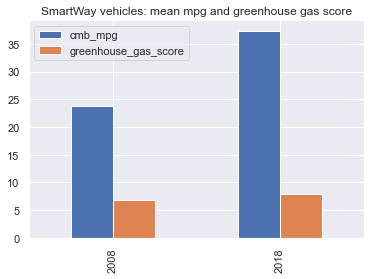

In [119]:
df_smartway_avg.plot(kind='bar', title='SmartWay vehicles: mean mpg and greenhouse gas score');

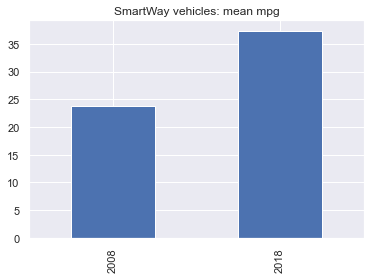

In [120]:
df_smartway_avg[Col.cmb_mpg].plot(kind='bar', title='SmartWay vehicles: mean mpg');

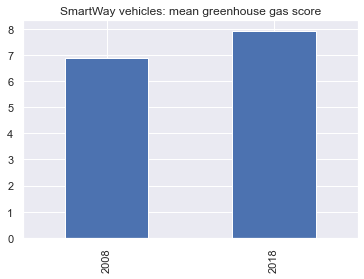

In [121]:
df_smartway_avg[Col.greenhouse_gas_score].plot(kind='bar', title='SmartWay vehicles: mean greenhouse gas score');

Both fuel efficiency and the greenhouse gas score
have significantly improved for SmartWay vehicles between 2008 and 2018.

#### Q4: Features associated with fuel economy

What features are associated with better fuel economy?

In [122]:
features_for_fuel_economy_columns = [Col.displ, Col.cyl, Col.trans, Col.veh_class, Col.drive, Col.fuel, Col.air_pollution_score]

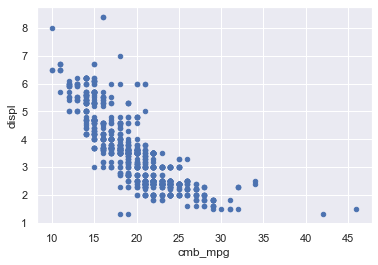

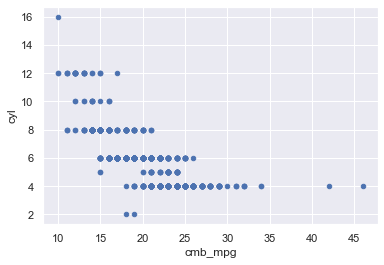

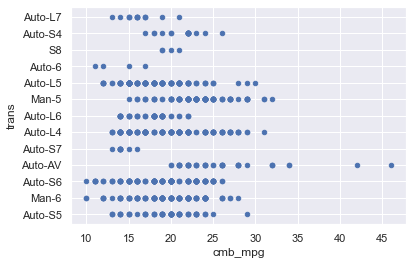

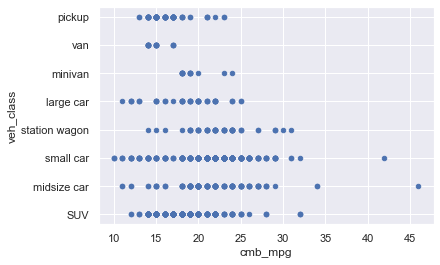

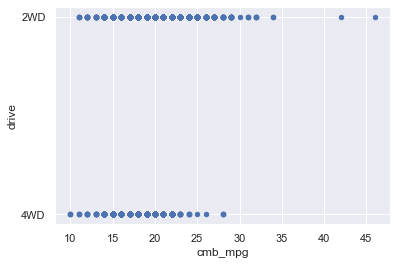

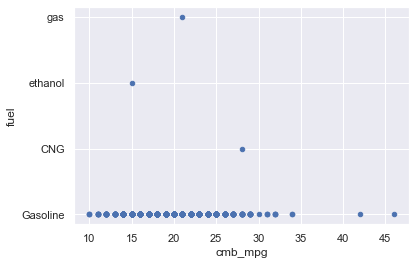

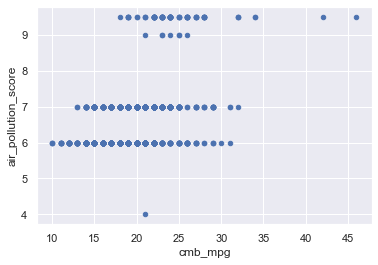

In [123]:
color = 'b'
for col in features_for_fuel_economy_columns:
    df_clean_08.plot(kind='scatter', c=color, x=Col.cmb_mpg, y=col);

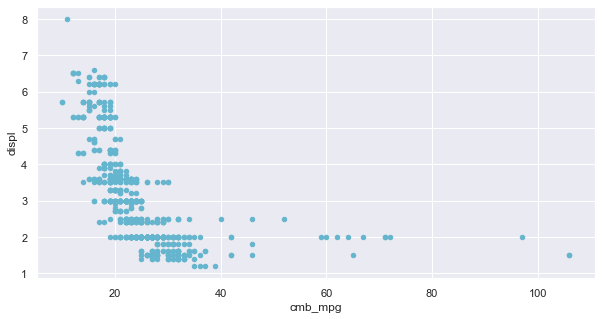

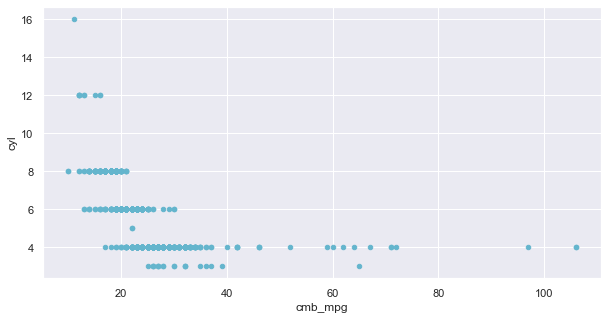

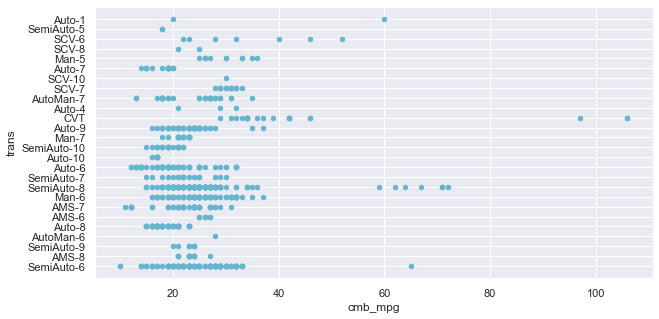

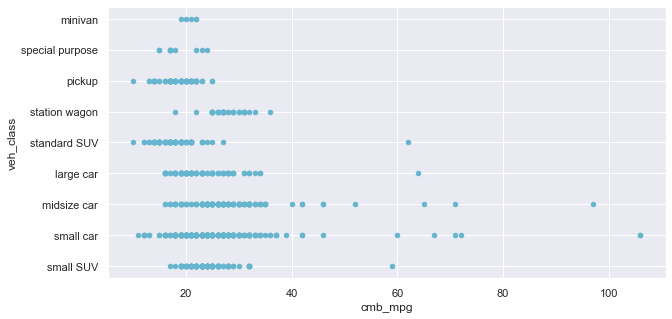

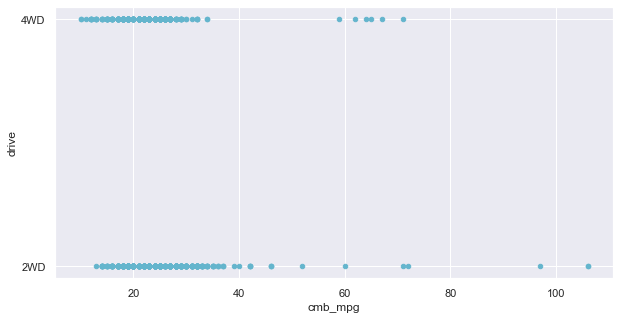

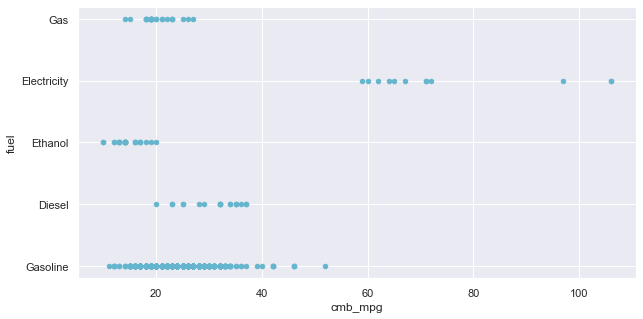

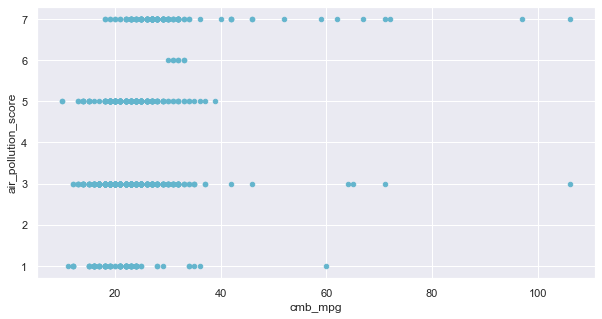

In [124]:
color = 'c'
for col in features_for_fuel_economy_columns:
    df_clean_18.plot(kind='scatter', c=color, x=Col.cmb_mpg, y=col, figsize=(10,5));

Analyze displacement vs. number of cylinders

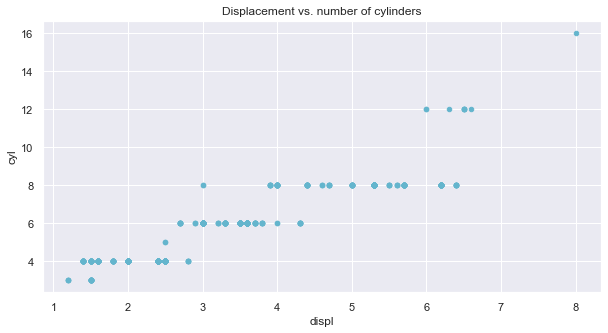

In [125]:
df_clean_18.plot(kind='scatter', c=color, x=Col.displ, y=Col.cyl, figsize=(10,5), title='Displacement vs. number of cylinders');

Analyze vehicle class vs drive type (2WD/4WD).

In [126]:
veh_class_vs_drive_counts = df_clean_18.groupby(Col.veh_class)[Col.drive].value_counts()
veh_class_vs_drive_counts

veh_class        drive
large car        2WD       52
                 4WD       36
midsize car      2WD       87
                 4WD       51
minivan          2WD        5
pickup           2WD       39
                 4WD       39
small SUV        4WD       73
                 2WD       35
small car        2WD      185
                 4WD      100
special purpose  2WD        7
                 4WD        3
standard SUV     4WD       57
                 2WD       29
station wagon    2WD       17
                 4WD       17
Name: drive, dtype: int64

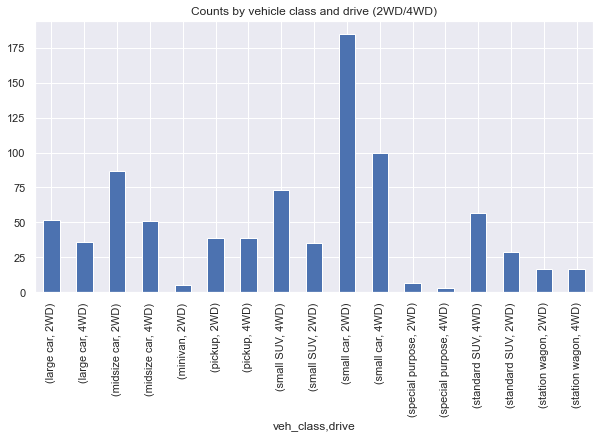

In [127]:
veh_class_vs_drive_counts.plot(kind='bar', figsize=(10,5), title='Counts by vehicle class and drive (2WD/4WD)');

In [128]:
veh_class_counts = df_clean_18.groupby(Col.veh_class).count()[Col.drive].sort_values(ascending=False)
veh_class_counts

veh_class
small car          285
midsize car        138
small SUV          108
large car           88
standard SUV        86
pickup              78
station wagon       34
special purpose     10
minivan              5
Name: drive, dtype: int64

In [129]:
veh_class_counts_4wd = df_clean_18.groupby(Col.drive)[Col.veh_class].value_counts()['4WD']
veh_class_counts_4wd

veh_class
small car          100
small SUV           73
standard SUV        57
midsize car         51
pickup              39
large car           36
station wagon       17
special purpose      3
Name: veh_class, dtype: int64

In [130]:
veh_class_counts_4wd_percentage = (veh_class_counts_4wd / veh_class_counts * 100).dropna().sort_values(ascending=False)
veh_class_counts_4wd_percentage

veh_class
small SUV          67.592593
standard SUV       66.279070
station wagon      50.000000
pickup             50.000000
large car          40.909091
midsize car        36.956522
small car          35.087719
special purpose    30.000000
dtype: float64

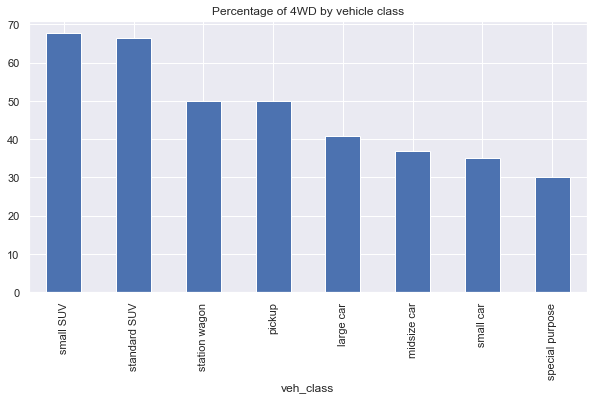

In [131]:
veh_class_counts_4wd_percentage.plot(kind='bar', figsize=(10,5), title='Percentage of 4WD by vehicle class');

Analyze air pollution scores.

In [132]:
mean_air_pollution_score_by_fuel = df_clean_18.groupby(Col.fuel)[[Col.air_pollution_score]].mean()\
    .sort_values(by=Col.air_pollution_score, ascending=False)
mean_air_pollution_score_by_fuel

,air_pollution_score
fuel,
Electricity,5.166667
Gasoline,4.024032
Ethanol,3.692308
Gas,3.692308
Diesel,2.368421


In [133]:
median_air_pollution_score_by_fuel = df_clean_18.groupby(Col.fuel)[[Col.air_pollution_score]].median()\
    .sort_values(by=Col.air_pollution_score, ascending=False)
median_air_pollution_score_by_fuel

,air_pollution_score
fuel,
Electricity,7.0
Diesel,3.0
Ethanol,3.0
Gas,3.0
Gasoline,3.0


In [134]:
df_clean_18_by_fuel = df_clean_18.groupby(Col.fuel)[[Col.air_pollution_score]]
df_air_pollution_score_by_fuel = df_clean_18_by_fuel.mean()\
    .join(df_clean_18_by_fuel.median(), lsuffix="_mean", rsuffix="_median")\
    .sort_values(Col.air_pollution_score + "_mean", ascending=False)

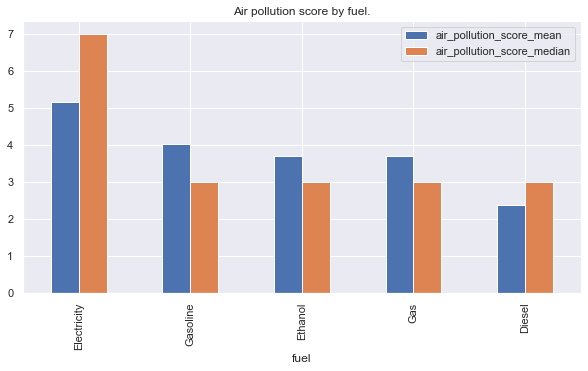

In [135]:
df_air_pollution_score_by_fuel.plot(kind='bar', figsize=(10,5), title='Air pollution score by fuel.');

Findings for relationships between features and fuel economy:
- _Displacement_: 
lower displacement is associated with better mpg.
- _Cylinders_: 
fewer cylinders are associated with better mpg.
Engines with fewer cylinders also tend to have lower displacement,
which is again associated with better mpg.
- _Transmission_:
While there is no overall correlation, it looks like variable transmission (SCV, CVT),
and 8-gear semi-automatic transmission (SemiAuto-S8) are associated with some of the more fuel-efficient vehicles.
- _Vehicle type_:
small and midsize cars are notably more fuel-efficient than other car classes.
- _Drive (2WD vs. 4WD)_:
vehicles with 2WD are overall more fuel-efficient than 4WD vehicles.
This can also be related to 4WD being more predominant in the vehicle classes
that are bigger and have higher fuel consumption, especially SUVs and pickups.
- _Fuel_:
    - Electric cars are by far the most efficient.
    However, electric cars have a fundamental advantage w.r.t. consumption measurement,
    because the losses during generation of electricity are not accounted for.
    Those losses, on the other hand, are less relevant if the electricity used for charging
    comes from clean/renewable energy sources.
    - Diesel cars are overall quite efficient and only beaten by some gasoline cars and electric cars.
    - Gasoline cars have a wide range from very inefficient to some very efficient cars only beaten by electric cars.
    - Gas cars have similar efficiency as the less efficient gasoline cars.
    - Ethanol cars are the least efficient.
- _Air pollution score_:
Cars with air pollution scores between 1 and 6 tend to have similar fuel efficiency,
with some outliers having scores of 1 and 3.
For air pollution score 7 there are many cars with very high fuel efficiency.
This could be because electric cars have both best fuel efficiency and best median air pollution score.
 

#### Q5: Fuel efficiency improvement from 2008 to 2018

For all models that were produced in 2008 and are still being produced now,
how much has the mpg improved and which vehicle has improved the most?

In [136]:
suffix_2008 = "_2008"
suffix_2018 = "_2018"
df_clean_combined = df_clean_08.join(df_clean_18, lsuffix=suffix_2008)
df_clean_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,hwy_mpg_2008,...,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway,city_lp100km,city_kmpl,cmb_lp100km,cmb_kmpl,hwy_lp100km,hwy_kmpl
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,28.0,23.0,5.0,No,11.760729,8.502874,10.226721,9.778305,8.400521,11.904024
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,27.0,22.0,4.0,No,12.379715,8.077730,10.691572,9.353162,8.711651,11.478880
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,...,33.0,27.0,6.0,No,10.226721,9.778305,8.711651,11.478880,7.127715,14.029742
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,...,32.0,24.0,5.0,No,11.760729,8.502874,9.800608,10.203449,7.350456,13.604599
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,...,30.0,24.0,5.0,No,11.200694,8.928018,9.800608,10.203449,7.840486,12.754311


In [137]:
df_mpg_by_model = df_clean_combined.groupby(Col.model)[[Col.cmb_mpg + suffix_2008, Col.cmb_mpg + suffix_2018]].mean()
df_mpg_by_model.head()

KeyError: "Columns not found: 'cmb_mpg_2018'"

In [ ]:
df_mpg_by_model[Col.mpg_change] = df_mpg_by_model[Col.cmb_mpg] - df_mpg_by_model[Col.cmb_mpg + suffix_2008]
df_mpg_by_model.head()

In [ ]:
model_with_max_mpg_change = df_mpg_by_model[Col.mpg_change].idxmax()
max_mpg_change = df_mpg_by_model[Col.mpg_change][model_with_max_mpg_change]
print(f"Model '{model_with_max_mpg_change}' has maximum change in mpg of {max_mpg_change:.1f} from 2008 to 2018")
